![](../../img/330-banner.png)

# Tutorial 3

UBC 2024-25

## Outline

During this tutorial, we will focus on preprocessing - the necessary steps to perform to make the data meaningful for a learning algorithm.

All questions can be discussed with your classmates and the TAs - this is not a graded exercise!

In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML

sys.path.append("../../code/.")
# from plotting_functions import *
# from utils import *

pd.set_option("display.max_colwidth", 200)

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## `ColumnTransformer` on the California housing dataset 

In this notebook, you will practice features preprocessing using the [California housing dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Let's start by loading the dataset (this is done for you):

In [3]:
housing_df = pd.read_csv("../../data/housing.csv")
train_df, test_df = train_test_split(housing_df, test_size=0.1, random_state=123)

train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6051,-117.75,34.04,22.0,2948.0,636.0,2600.0,602.0,3.1250,113600.0,INLAND
20113,-119.57,37.94,17.0,346.0,130.0,51.0,20.0,3.4861,137500.0,INLAND
14289,-117.13,32.74,46.0,3355.0,768.0,1457.0,708.0,2.6604,170100.0,NEAR OCEAN
13665,-117.31,34.02,18.0,1634.0,274.0,899.0,285.0,5.2139,129300.0,INLAND
14471,-117.23,32.88,18.0,5566.0,1465.0,6303.0,1458.0,1.8580,205000.0,NEAR OCEAN


Let's also add some new features that may help us with the prediction:

In [4]:
train_df = train_df.assign(
    rooms_per_household=train_df["total_rooms"] / train_df["households"]
)
test_df = test_df.assign(
    rooms_per_household=test_df["total_rooms"] / test_df["households"]
)

train_df = train_df.assign(
    bedrooms_per_household=train_df["total_bedrooms"] / train_df["households"]
)
test_df = test_df.assign(
    bedrooms_per_household=test_df["total_bedrooms"] / test_df["households"]
)

train_df = train_df.assign(
    population_per_household=train_df["population"] / train_df["households"]
)
test_df = test_df.assign(
    population_per_household=test_df["population"] / test_df["households"]
)

Finally, we are separating for you the target from the features:

In [6]:
# Let's keep both numeric and categorical columns in the data.
X_train = train_df.drop(columns=["median_house_value"])
y_train = train_df["median_house_value"]

X_test = test_df.drop(columns=["median_house_value"])
y_test = test_df["median_house_value"]

## Step 1

Your turn now! Start by importing ColumnTranformer and make_column_transformer

In [7]:
from sklearn.compose import ColumnTransformer, make_column_transformer

## Step 2

Next, group features by type (numerical or categorical). You may also want to save the target separately. 

In [8]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
6051,-117.75,34.04,22.0,2948.0,636.0,2600.0,602.0,3.1250,INLAND,4.897010,1.056478,4.318937
20113,-119.57,37.94,17.0,346.0,130.0,51.0,20.0,3.4861,INLAND,17.300000,6.500000,2.550000
14289,-117.13,32.74,46.0,3355.0,768.0,1457.0,708.0,2.6604,NEAR OCEAN,4.738701,1.084746,2.057910
13665,-117.31,34.02,18.0,1634.0,274.0,899.0,285.0,5.2139,INLAND,5.733333,0.961404,3.154386
14471,-117.23,32.88,18.0,5566.0,1465.0,6303.0,1458.0,1.8580,NEAR OCEAN,3.817558,1.004801,4.323045


In [13]:
numerical_features = ["longitude", 
                   "latitude", 
                   "housing_median_age", 
                   "households", 
                   "median_income", 
                   "rooms_per_household",
                   "bedrooms_per_household",
                   "population_per_household"]
categorical_features = ["ocean_proximity"]
target="median_income"

## Step 3

Create a ColumnTransformer for your features. The transformer should include imputation and scaling for numeric features, and encoding for categorical features (which type of encoding?)

In [16]:
ct = make_column_transformer(
    (
        make_pipeline(SimpleImputer(strategy="median"), StandardScaler()), 
        numerical_features
    ),
    (
        OneHotEncoder(handle_unknown="ignore"), 
        categorical_features
    )
)

## Step 4

Visualize the transformed training set as a dataframe

In [20]:
transformed = ct.fit_transform(X_train)
ct.named_transformers_

{'pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore'),
 'remainder': 'drop'}

In [25]:
column_names = (
    numerical_features +
    ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
column_names

['longitude',
 'latitude',
 'housing_median_age',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_household',
 'population_per_household',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [ ]:
column_names = ct.get_feature_names_out()
column_names

array(['pipeline__longitude', 'pipeline__latitude',
       'pipeline__housing_median_age', 'pipeline__households',
       'pipeline__median_income', 'pipeline__rooms_per_household',
       'pipeline__bedrooms_per_household',
       'pipeline__population_per_household',
       'onehotencoder__ocean_proximity_<1H OCEAN',
       'onehotencoder__ocean_proximity_INLAND',
       'onehotencoder__ocean_proximity_ISLAND',
       'onehotencoder__ocean_proximity_NEAR BAY',
       'onehotencoder__ocean_proximity_NEAR OCEAN'], dtype=object)

In [27]:
pd.DataFrame(transformed, columns=column_names)

,pipeline__longitude,pipeline__latitude,pipeline__housing_median_age,pipeline__households,pipeline__median_income,pipeline__rooms_per_household,pipeline__bedrooms_per_household,pipeline__population_per_household,onehotencoder__ocean_proximity_<1H OCEAN,onehotencoder__ocean_proximity_INLAND,onehotencoder__ocean_proximity_ISLAND,onehotencoder__ocean_proximity_NEAR BAY,onehotencoder__ocean_proximity_NEAR OCEAN
0,0.908140,-0.743917,-0.526078,0.266135,-0.389736,-0.210591,-0.083813,0.126398,0.0,1.0,0.0,0.0,0.0
1,-0.002057,1.083123,-0.923283,-1.253312,-0.198924,4.726412,11.166631,-0.050132,0.0,1.0,0.0,0.0,0.0
2,1.218207,-1.352930,1.380504,0.542873,-0.635239,-0.273606,-0.025391,-0.099240,0.0,0.0,0.0,0.0,1.0
3,1.128188,-0.753286,-0.843842,-0.561467,0.714077,0.122307,-0.280310,0.010183,0.0,1.0,0.0,0.0,0.0
4,1.168196,-1.287344,-0.843842,2.500924,-1.059242,-0.640266,-0.190617,0.126808,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18571,0.733102,-0.804818,0.586095,-0.966131,-0.118182,0.063110,-0.099558,0.071541,1.0,0.0,0.0,0.0,0.0
18572,1.163195,-1.057793,-1.161606,0.728235,0.357500,0.235096,-0.163397,0.007458,1.0,0.0,0.0,0.0,0.0
18573,-1.097293,0.797355,-1.876574,0.514155,0.934269,0.211892,-0.135305,0.044029,1.0,0.0,0.0,0.0,0.0
18574,-1.437367,1.008167,1.221622,-0.454427,0.006578,-0.273382,-0.149822,-0.132875,0.0,0.0,0.0,1.0,0.0


## Step 5

Finally, let's train a classifier (or even better, for practice, a baseline and another classifier): 
- create a pipeline with the preprocessor and a classifier of your choice.
- use the pipeline to perform cross-validation

In [30]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)

0.0

In [ ]:
from sklearn.tree import DecisionTreeRegressor

pipe = make_pipeline(ct, DecisionTreeRegressor())

scores = cross_validate(pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(pd.DataFrame(scores).mean())

# decision tree, different scoring

,0
fit_time,0.132372
score_time,0.004384
test_score,0.628676
train_score,1.000000


In [49]:
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(ct, RandomForestRegressor())
pipe.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('randomforestregressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('pipeline', ...), ('onehotencoder', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the out

In [ ]:
from sklearn.metrics import make_scorer

def mape(true, pred):
    return 100.*np.mean(np.abs((pred - true)/true))

mape_scorer = make_scorer(mape, greater_is_better=False) #thus below flipped sign because loss function.  in production would inlude - in front.

In [59]:
scores = cross_validate(pipe, X_train, y_train, scoring=mape_scorer, return_train_score=True)
pd.DataFrame(pd.DataFrame(scores).mean())

,0
fit_time,7.441866
score_time,0.082588
test_score,-18.087354
train_score,-6.758885


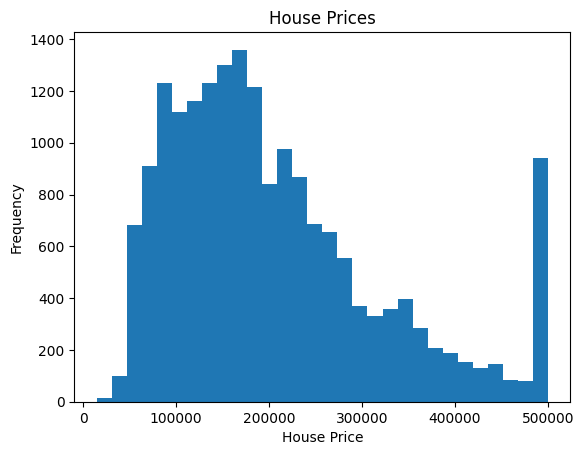

In [41]:
plt.hist(y_train, bins=30)
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('House Prices')
plt.show()

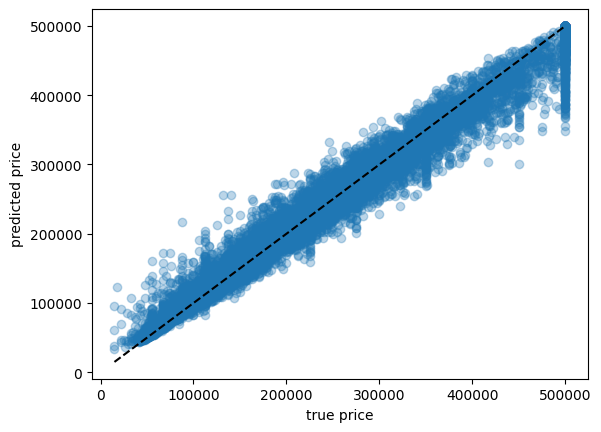

In [47]:
plt.scatter(y_train, pipe.predict(X_train), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true price");
plt.ylabel("predicted price");

In [9]:
from sklearn.svm import SVR

knn_pipe = make_pipeline(preprocessor, KNeighborsRegressor())

scores = cross_validate(knn_pipe, X_train, y_train, cv=10, return_train_score=True)

pd.DataFrame(pd.DataFrame(scores).mean())

,0
fit_time,0.152148
score_time,0.355053
test_score,0.700108
train_score,0.804845


## <font color='red'>Recap/comprehension questions</font>

- If we only plan to use a Decision Tree as classifier/regressor, do we still need to scale the numerical features?
- If the dataset included an ordinal feature "Neighbourhood desirability", with numerical labels 1 (poor), 2 (good) and 3 (excellent), would we need to apply an ordinal encoder to it?
- Why do we add the argument `drop="if_binary"` to `OneHotEncoder` when dealing with categorical features with only two possible values? What would be the disadvantages of not doing so?

**Solution:**
- Since Decision Trees handle features independently, it is not necessary to scale features to the same range; however, since we work with pipelines and it may happen that we want to switch model, it is common to always include the scaling step.
- No, when ordinal features are already assigned numerical labels, we do not need to encode them (if we could, we would end up with the same numbers we started with!); we just want to be aware that these numerical values are labels and not actual integers (e.g. it would not make sense to add 1 (poor) + 2 (good) to get 3 (excellent)).
- By not using the `drop="if_binary"` when encoding categorical features with only two possible values, we would end up with two new columns that say exactly the same thing, just in the opposite way (for example, a "Yes" column would be exactly the opposite of a "No" column). Not only this is a waste of memory and computational time, but it could create problems for some models that are sensitive to highly correlated features, like linear models.